In [40]:
from   faraway.datasets import (
    cheddar, prostate, teengamb, uswages, wafer)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import patsy
import statsmodels.formula.api as smf

### 1

In [2]:
tg = teengamb.load()
tg.head()

,sex,status,income,verbal,gamble
0,1,51,2.0,8,0.0
1,1,28,2.5,8,0.0
2,1,37,2.0,6,0.0
3,1,28,7.0,4,7.3
4,1,65,2.0,8,19.6


In [3]:
lmod = smf.ols('gamble ~ sex + status + income + verbal', data=tg).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 gamble   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     11.69
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           1.81e-06
Time:                        21:12:34   Log-Likelihood:                -210.78
No. Observations:                  47   AIC:                             431.6
Df Residuals:                      42   BIC:                             440.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5557     17.197      1.312      0.197     -12.149      57.260
sex          -22.1183      8.211     -2.694      0.010     -38.689      -5.548
status         0.0522      0.281      0.186      0.853      -0.515       0.620
income         4.9620      1.025      4.839      0.000       2.893       7.031
verbal        -2.9595      2.172     -1.362      0.180      -7.343       1.424
==============================================================================
Omnibus:                       31.143   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.046
Skew:                           1.604   Prob(JB):                     1.14e-22
Kurtosis:                       9.427   Cond. No.                         264.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
lmod.resid.idxmax()

23

In [5]:
lmod.resid.mean(), lmod.resid.median()

(6.743352920974312e-13, -1.4513920689688593)

In [6]:
lmod.fittedvalues.corr(lmod.resid)

1.1390689371420674e-15

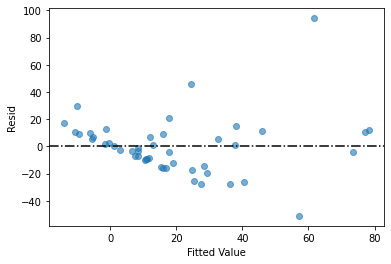

In [7]:
plt.scatter(lmod.fittedvalues, lmod.resid, alpha=0.6)
plt.xlabel('Fitted Value')
plt.ylabel('Resid')
plt.axhline(y=0, color='k', linestyle='-.');

### 2

In [8]:
wages = uswages.load()
wages.head()

,wage,educ,exper,race,smsa,ne,mw,so,we,pt
0,771.60,18,18,0,1,1,0,0,0,0
1,617.28,15,20,0,1,0,0,0,1,0
2,957.83,16,9,0,1,0,0,1,0,0
3,617.28,12,24,0,1,1,0,0,0,0
4,902.18,14,12,0,1,0,1,0,0,0


In [9]:
lmod = smf.ols('wage ~ educ + exper', data=wages).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     156.0
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           1.12e-63
Time:                        21:12:34   Log-Likelihood:                -14954.
No. Observations:                2000   AIC:                         2.991e+04
Df Residuals:                    1997   BIC:                         2.993e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -242.7994     50.682     -4.791      0.000    -342.194    -143.405
educ          51.1753      3.342     15.313      0.000      44.621      57.729
exper          9.7748      0.751     13.023      0.000       8.303      11.247
==============================================================================
Omnibus:                     2053.606   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           273039.327
Skew:                           4.662   Prob(JB):                         0.00
Kurtosis:                      59.476   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
for field in ['wage', 'educ', 'exper']:
    print(f'{field}: {wages[field].min()}')

wage: 50.39
educ: 0
exper: -2


In [11]:
lmod.fittedvalues.corr(wages.wage) ** 2  # = r.sq

0.13511856829197744

In [12]:
lmod2 = smf.ols('wage ~ -1 + educ + exper', data=wages).fit()
lmod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   wage   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.682
Method:                 Least Squares   F-statistic:                              2141.
Date:                Mon, 21 Mar 2022   Prob (F-statistic):                        0.00
Time:                        21:12:34   Log-Likelihood:                         -14965.
No. Observations:                2000   AIC:                                  2.993e+04
Df Residuals:                    1998   BIC:                                  2.995e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
educ          36.0136      1.079     33.366      0.000      33.897      38.130
exper          7.8540      0.638     12.310      0.000       6.603       9.105
==============================================================================
Omnibus:                     2011.662   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234551.592
Skew:                           4.544   Prob(JB):                         0.00
Kurtosis:                      55.269   Cond. No.                         3.13
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
(lmod.resid ** 2).sum(), (lmod2.resid ** 2).sum()

(365568644.1794716, 369769962.8703743)

In [14]:
lmod.ssr, lmod2.ssr

(365568644.17947155, 369769962.8703743)

In [15]:
wages['logwage'] = np.log(wages.wage)

In [16]:
lmod3 = smf.ols('logwage ~ educ + exper', data=wages).fit()
lmod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logwage   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     211.6
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           4.49e-84
Time:                        21:12:36   Log-Likelihood:                -2009.8
No. Observations:                2000   AIC:                             4026.
Df Residuals:                    1997   BIC:                             4042.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6503      0.078     59.350      0.000       4.497       4.804
educ           0.0905      0.005     17.517      0.000       0.080       0.101
exper          0.0181      0.001     15.579      0.000       0.016       0.020
==============================================================================
Omnibus:                      213.468   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.342
Skew:                          -0.677   Prob(JB):                     4.35e-93
Kurtosis:                       4.809   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
np.exp(0.0181)

1.0182647977784174

In [18]:
lmod4 = smf.ols(
    'logwage ~ educ + exper + ne + mw + we + so', data=wages
).fit()
lmod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logwage   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     85.47
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           1.49e-81
Time:                        21:12:36   Log-Likelihood:                -2007.8
No. Observations:                2000   AIC:                             4028.
Df Residuals:                    1994   BIC:                             4061.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7234      0.063     59.210      0.000       3.600       3.847
educ           0.0904      0.005     17.466      0.000       0.080       0.101
exper          0.0181      0.001     15.577      0.000       0.016       0.020
ne             0.9394      0.032     29.746      0.000       0.877       1.001
mw             0.8966      0.030     29.551      0.000       0.837       0.956
we             0.9765      0.031     31.003      0.000       0.915       1.038
so             0.9109      0.028     32.899      0.000       0.857       0.965
==============================================================================
Omnibus:                      213.989   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.663
Skew:                          -0.682   Prob(JB):                     2.73e-92
Kurtosis:                       4.789   Cond. No.                     3.27e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
lmod4b = smf.ols(
    'logwage ~ educ + exper + ne + mw + we + so', data=wages
).fit(method='qr')
lmod4b.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1840: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logwage   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     85.46
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           1.49e-81
Time:                        21:12:36   Log-Likelihood:                -2007.8
No. Observations:                2000   AIC:                             4028.
Df Residuals:                    1994   BIC:                             4061.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.209e+11        nan        nan        nan         nan         nan
educ           0.0904      0.005     17.462      0.000       0.080       0.101
exper          0.0181      0.001     15.577      0.000       0.016       0.020
ne         -2.209e+11        nan        nan        nan         nan         nan
mw         -2.209e+11        nan        nan        nan         nan         nan
we         -2.209e+11        nan        nan        nan         nan         nan
so         -2.209e+11        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                      213.954   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.521
Skew:                          -0.682   Prob(JB):                     2.94e-92
Kurtosis:                       4.788   Cond. No.                     3.27e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
wages.head()

,wage,educ,exper,race,smsa,ne,mw,so,we,pt,logwage
0,771.60,18,18,0,1,1,0,0,0,0,6.648466
1,617.28,15,20,0,1,0,0,0,1,0,6.425323
2,957.83,16,9,0,1,0,0,1,0,0,6.864670
3,617.28,12,24,0,1,1,0,0,0,0,6.425323
4,902.18,14,12,0,1,0,1,0,0,0,6.804814


In [21]:
(wages[['ne', 'mw', 'so', 'we']].sum(axis=1) == 1).all()

True

In [22]:
# Over-specified - drop one region col (coefs now relative to ne)
lmod4b = smf.ols(
    'logwage ~ educ + exper + mw + we + so', data=wages
).fit(method='qr')
lmod4b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logwage   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     85.47
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           1.49e-81
Time:                        21:12:37   Log-Likelihood:                -2007.8
No. Observations:                2000   AIC:                             4028.
Df Residuals:                    1994   BIC:                             4061.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6628      0.084     55.270      0.000       4.497       4.828
educ           0.0904      0.005     17.466      0.000       0.080       0.101
exper          0.0181      0.001     15.577      0.000       0.016       0.020
mw            -0.0428      0.043     -0.999      0.318      -0.127       0.041
we             0.0371      0.045      0.830      0.406      -0.051       0.125
so            -0.0285      0.041     -0.699      0.485      -0.108       0.051
==============================================================================
Omnibus:                      213.989   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.663
Skew:                          -0.682   Prob(JB):                     2.73e-92
Kurtosis:                       4.789   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3

In [23]:
prost = prostate.load()
prost.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579819,2.7695,50,-1.386294,0,-1.38629,6,0,-0.43078
1,-0.994252,3.3196,58,-1.386294,0,-1.38629,6,0,-0.16252
2,-0.510826,2.6912,74,-1.386294,0,-1.38629,7,20,-0.16252
3,-1.203973,3.2828,58,-1.386294,0,-1.38629,6,0,-0.16252
4,0.751416,3.4324,62,-1.386294,0,-1.38629,6,0,0.37156


In [24]:
predictors = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 
              'gleason', 'pgg45']
formula = 'lpsa ~'
p = []
rss = []
rsq = []
adj_rsq = []

In [25]:
for i, pred in enumerate(predictors):
    formula += f' + {pred}'
    mod = smf.ols(formula, data=prost).fit()
    p.append(i)
    rss.append(mod.ssr)
    rsq.append(mod.rsquared)
    adj_rsq.append(mod.rsquared_adj)

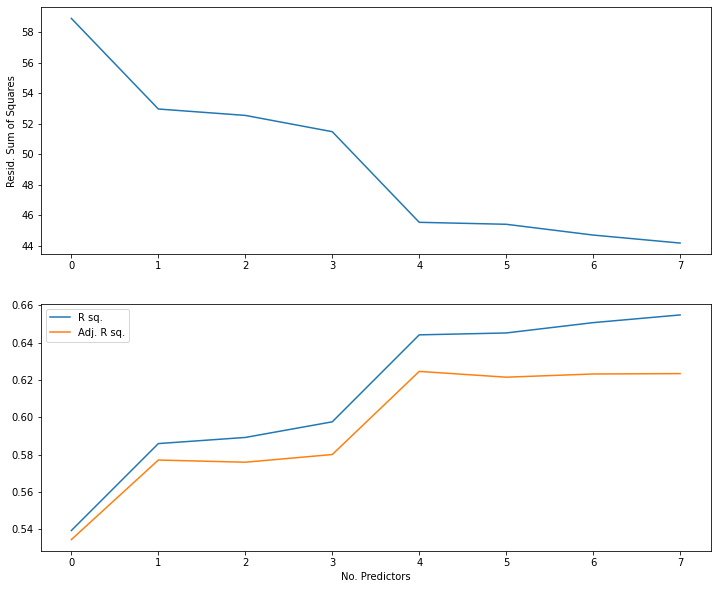

In [26]:
plt.figure(figsize=[12, 10])
plt.subplot(211)
plt.plot(p, rss)
plt.ylabel('Resid. Sum of Squares')

plt.subplot(212)
plt.plot(p, rsq,label='R sq.')
plt.plot(p, adj_rsq, label='Adj. R sq.')
plt.xlabel('No. Predictors')
plt.legend();

### 4 

In [27]:
m1 = smf.ols('lcavol ~ lpsa', data=prost).fit()
m2 = smf.ols('lpsa ~ lcavol', data=prost).fit()

In [28]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lcavol   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     111.3
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           1.12e-17
Time:                        21:12:50   Log-Likelihood:                -115.47
No. Observations:                  97   AIC:                             234.9
Df Residuals:                      95   BIC:                             240.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5086      0.194     -2.619      0.010      -0.894      -0.123
lpsa           0.7499      0.071     10.548      0.000       0.609       0.891
==============================================================================
Omnibus:                        0.741   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.690   Jarque-Bera (JB):                0.805
Skew:                          -0.056   Prob(JB):                        0.669
Kurtosis:                       2.568   Cond. No.                         7.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     111.3
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           1.12e-17
Time:                        21:12:51   Log-Likelihood:                -113.45
No. Observations:                  97   AIC:                             230.9
Df Residuals:                      95   BIC:                             236.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5073      0.122     12.361      0.000       1.265       1.749
lcavol         0.7193      0.068     10.548      0.000       0.584       0.855
==============================================================================
Omnibus:                        0.403   Durbin-Watson:                   1.237
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.548
Skew:                          -0.128   Prob(JB):                        0.760
Kurtosis:                       2.735   Cond. No.                         3.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
lcavol_new = pd.DataFrame(
    np.linspace(prost.lcavol.min(), prost.lcavol.max(), 100),
    columns=['lcavol'])
lpsa_new = pd.DataFrame(
    np.linspace(prost.lpsa.min(), prost.lpsa.max(), 100),
    columns=['lpsa'])
fit1 = m1.predict(lpsa_new)
fit2 = m2.predict(lcavol_new)

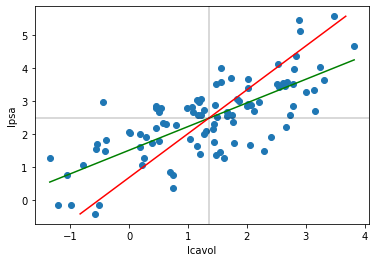

In [31]:
plt.scatter(prost.lcavol, prost.lpsa)
plt.plot(lcavol_new, fit2, color='g')
plt.plot(fit1, lpsa_new, color='r')
# intersection at sample means
plt.axvline(x=prost.lcavol.mean(), color='k', alpha=0.2)
plt.axhline(y=prost.lpsa.mean(), color='k', alpha=0.2)
plt.xlabel('lcavol')
plt.ylabel('lpsa');

### 5

In [32]:
ched = cheddar.load()
ched.head()

,taste,Acetic,H2S,Lactic
0,12.3,4.543,3.135,0.86
1,20.9,5.159,5.043,1.53
2,39.0,5.366,5.438,1.57
3,47.9,5.759,7.496,1.81
4,5.6,4.663,3.807,0.99


In [33]:
mod = smf.ols('taste ~ Acetic + H2S + Lactic', data=ched).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  taste   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     16.22
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           3.81e-06
Time:                        21:12:54   Log-Likelihood:                -109.89
No. Observations:                  30   AIC:                             227.8
Df Residuals:                      26   BIC:                             233.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.8768     19.735     -1.463      0.155     -69.444      11.690
Acetic         0.3277      4.460      0.073      0.942      -8.839       9.495
H2S            3.9118      1.248      3.133      0.004       1.346       6.478
Lactic        19.6705      8.629      2.280      0.031       1.933      37.408
==============================================================================
Omnibus:                        1.923   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.143
Skew:                           0.474   Prob(JB):                        0.565
Kurtosis:                       3.130   Cond. No.                         92.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
fitted = mod.predict(ched)
rho = fitted.corr(ched.taste)
rho

0.8073256405111666

In [35]:
rho ** 2

0.6517746898267655

In [36]:
mod2 = smf.ols('taste ~ - 1 + Acetic + H2S + Lactic', data=ched).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  taste   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              71.15
Date:                Mon, 21 Mar 2022   Prob (F-statistic):                    6.10e-13
Time:                        21:12:58   Log-Likelihood:                         -111.08
No. Observations:                  30   AIC:                                      228.2
Df Residuals:                      27   BIC:                                      232.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Acetic        -5.4537      2.111     -2.583      0.016      -9.786      -1.121
H2S            4.5762      1.187      3.854      0.001       2.140       7.012
Lactic        19.1269      8.801      2.173      0.039       1.068      37.186
==============================================================================
Omnibus:                        6.066   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                4.330
Skew:                           0.836   Prob(JB):                        0.115
Kurtosis:                       3.818   Cond. No.                         40.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
mod.ssr, mod2.ssr

(2668.4110863223423, 2888.1383413293133)

### 6

In [39]:
waf = wafer.load()
waf.head()

,x1,x2,x3,x4,resist
0,-,-,-,-,193.4
1,+,-,-,-,247.6
2,-,+,-,-,168.2
3,+,+,-,-,205.0
4,-,-,+,-,303.4


In [41]:
mod = smf.ols('resist ~ x1 + x2 + x3 + x4', data=waf).fit()
mod.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 resist   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     10.97
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           0.000781
Time:                        21:16:03   Log-Likelihood:                -72.091
No. Observations:                  16   AIC:                             154.2
Df Residuals:                      11   BIC:                             158.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    221.7563     14.769     15.015      0.000     189.250     254.263
x1[T.-]      -25.7625     13.210     -1.950      0.077     -54.837       3.312
x2[T.-]       69.8875     13.210      5.291      0.000      40.813      98.962
x3[T.-]      -43.5875     13.210     -3.300      0.007     -72.662     -14.513
x4[T.-]       14.4875     13.210      1.097      0.296     -14.587      43.562
==============================================================================
Omnibus:                        1.415   Durbin-Watson:                   0.868
Prob(Omnibus):                  0.493   Jarque-Bera (JB):                1.015
Skew:                          -0.351   Prob(JB):                        0.602
Kurtosis:                       1.986   Cond. No.                         4.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
X = patsy.dmatrix(
    'x1 + x2 + x3 + x4', data=waf, return_type='dataframe')
X

,Intercept,x1[T.-],x2[T.-],x3[T.-],x4[T.-]
0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0
2,1.0,1.0,0.0,1.0,1.0
3,1.0,0.0,0.0,1.0,1.0
4,1.0,1.0,1.0,0.0,1.0
5,1.0,0.0,1.0,0.0,1.0
6,1.0,1.0,0.0,0.0,1.0
7,1.0,0.0,0.0,0.0,1.0
8,1.0,1.0,1.0,1.0,0.0
9,1.0,0.0,1.0,1.0,0.0


In [43]:
X.corr()

,Intercept,x1[T.-],x2[T.-],x3[T.-],x4[T.-]
Intercept,NaN,NaN,NaN,NaN,NaN
x1[T.-],NaN,1.000000e+00,-4.163336e-17,0.000000e+00,0.000000e+00
x2[T.-],NaN,-4.163336e-17,1.000000e+00,0.000000e+00,0.000000e+00
x3[T.-],NaN,0.000000e+00,0.000000e+00,1.000000e+00,1.387779e-16
x4[T.-],NaN,0.000000e+00,0.000000e+00,1.387779e-16,1.000000e+00


In [44]:
mod2 = smf.ols('resist ~ x1 + x2 + x3', data=waf).fit()
mod2.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 resist   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     13.99
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           0.000319
Time:                        21:20:07   Log-Likelihood:                -72.921
No. Observations:                  16   AIC:                             153.8
Df Residuals:                      12   BIC:                             156.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    229.0000     13.321     17.191      0.000     199.976     258.024
x1[T.-]      -25.7625     13.321     -1.934      0.077     -54.786       3.261
x2[T.-]       69.8875     13.321      5.246      0.000      40.864      98.911
x3[T.-]      -43.5875     13.321     -3.272      0.007     -72.611     -14.564
==============================================================================
Omnibus:                        1.379   Durbin-Watson:                   0.720
Prob(Omnibus):                  0.502   Jarque-Bera (JB):                0.826
Skew:                          -0.052   Prob(JB):                        0.662
Kurtosis:                       1.892   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""